<a href="https://colab.research.google.com/github/ciepielajan/Multi-Class-Classification-NLP/blob/main/MLP_clean_placeholder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLP_clean_placeholder

#### Pobranie danych

In [22]:
# https://drive.google.com/file/d/1fI6EXyD9TMTC1jzdu206ljXOGNjdHprq/view?usp=sharing
!gdown --id "1fI6EXyD9TMTC1jzdu206ljXOGNjdHprq"

Downloading...
From: https://drive.google.com/uc?id=1fI6EXyD9TMTC1jzdu206ljXOGNjdHprq
To: /content/user_intent.zip
100% 271k/271k [00:00<00:00, 2.51MB/s]


In [23]:
!unzip "user_intent.zip"

Archive:  user_intent.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: validation.csv          


In [24]:
import pandas as pd
import numpy as np

data_set_train = pd.read_csv("train.csv")
data_set_valid = pd.read_csv("validation.csv")

print(data_set_train.shape)
print(data_set_valid.shape)

print(data_set_train.columns)
print(data_set_valid.columns)

(13784, 2)
(700, 2)
Index(['text', 'label'], dtype='object')
Index(['text', 'label'], dtype='object')


#### process text i placeholder

In [64]:
import re
def placeholder(sentence):
    sentence = re.sub(r"<[^>]+>", " ", sentence) # remove html tag - na początku żeby nie usunął później placeholderów

    #placehodlery
    sentence = re.sub('[\w\.-]+@[\w\.-]+', ' <email> ', sentence)  # maile
    sentence = re.sub('(https://|http://|)+[A-Za-z]+\.+[A-Za-z]+(\S)+', ' <link> ', sentence)  # linki
    sentence = re.sub('([0-9]{4}|[0-9]{2}|[0-9]{1})(\.|\-|\/)([0-9]{4}|[0-9]{2}|[0-9]{1})(\.|\-|\/)([0-9]{4}|[0-9]{2}|[0-9]{1})', ' <date> ', sentence)  # date
    sentence = re.sub('[0-9]{1,2}(\:|am|pm| am| pm)([0-9]{1,2}|\:|am|pm|)([0-9]{1,2}|\:|am|pm| am| pm|)(([0-9]{1,10})?)', ' <time> ', sentence)  # time
    sentence = re.sub('\s\d+(,\d+)*(\.\d+)?(\%)?\s', ' <number> ', sentence)  # number
    sentence = re.sub('@[A-Za-z0-9\.]+', ' <montion> ', sentence)  # @montion
    sentence = re.sub('#[A-Za-z0-9]+', ' <hashtag> ', sentence)  # #hastag

    #czyszczenie
    sentence = re.sub(r"[^a-zA-Z\<\>\s]", "", sentence)  # remove punctuations and numbers   nie usuwać <PLACEHOLDERÓW>
    sentence = re.sub('[A-Za-z0-9]+@[a-zA-z].[a-zA-Z]+', '', sentence)  # maile
    sentence = re.sub('(http[s]*:[/][/])[a-zA-Z0-9]+', '', sentence)  # linki
    sentence = re.sub(r"\b[A-Za-z]{1}\b", "", sentence)  # remove single characters
    sentence = re.sub("^\s+|\s+$", "", sentence, flags=re.UNICODE) # Remove spaces both in the BEGINNING and in the END of a string:
    sentence = " ".join(sentence.split(" "))  # Remove ONLY DUPLICATE spaces:
    sentence = sentence.lower()
    return sentence

In [18]:
# import re
# def process_text(sentence, placeholder=False):
#     # sentence = re.sub('[A-Za-z0-9]+@[a-zA-z].[a-zA-Z]+', '', sentence)  # maile
#     # sentence = re.sub('(http[s]*:[/][/])[a-zA-Z0-9]+', '', sentence)  # linki
#     # sentence = re.sub(r"<[^>]+>", " ", sentence) # remove html tag 
#     # sentence = re.sub(r"[^a-zA-Z\<\>\s]", "", sentence)  # remove punctuations and numbers   nie usuwać <PLACEHOLDERÓW>
#     # sentence = re.sub(r"[^a-zA-Z\s]", "", sentence)  # remove punctuations and numbers  usuwać wszytko bo nie ma placeholderów
#     # sentence = re.sub(r"\b[A-Za-z]{1}\b", "", sentence)  # remove single characters
#     # sentence = re.sub("^\s+|\s+$", "", sentence, flags=re.UNICODE) # Remove spaces both in the BEGINNING and in the END of a string:
#     # sentence = " ".join(re.split("\s+", sentence, flags=re.UNICODE))  # Remove ONLY DUPLICATE spaces:
#     # sentence = sentence.lower()
    
#     return sentence

In [67]:
data_set_train["clean_text_placeholder"] = data_set_train["text"].apply(lambda x: placeholder(x))

#### `LabelEncoder` oraz `to_categorical`

In [99]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical 


labelencoder = LabelEncoder()
labelencoder.fit(data_set_train["label"])

data_set_train["labelencoder"] = labelencoder.transform(data_set_train["label"])

dummy_y = to_categorical(data_set_train["labelencoder"], dtype ="float32")

data_set_train.head(5)

,text,label,clean_text_placeholder,labelencoder
0,find a cinema nearest for films,SearchScreeningEvent,find cinema nearest for films,6
1,Give the current series two stars.,RateBook,give the current series two stars,4
2,find The Good Girl at a movie house\n,SearchScreeningEvent,find the good girl at movie house,6
3,Please make reservations for three at a kosher...,BookRestaurant,please make reservations for three at kosher ...,1
4,what is the forecast for here one second from now,GetWeather,what is the forecast for here one second from now,2


In [100]:
warunek = data_set_train["clean_text_placeholder"].str.contains("<")
data_set_train[warunek]["clean_text_placeholder"].size

2622

In [101]:
data_set_train[warunek].sample(20)

,text,label,clean_text_placeholder,labelencoder
1972,Add Step to Me to the 50 Clásicos playlist.,AddToPlaylist,add step to me to the <number> clsicos playlist,0
5524,Give 2 out of 6 points to A Tale of Time City,RateBook,give <number> out of <number> points to tale...,4
5589,where is Wild America showing at zero P.M.,SearchScreeningEvent,where is wild america showing at zero <link>,6
6762,give 4 out of 6 stars to this textbook,RateBook,give <number> out of <number> stars to this te...,4
10481,Rate The Warrior Prophet 3 of 6 stars,RateBook,rate the warrior prophet <number> of <number> ...,4
13100,Will it be overcast in 1 minute within walking...,GetWeather,will it be overcast in <number> minute within ...,2
1592,Rate the current album 3 points,RateBook,rate the current album <number> points,4
5601,Show me KurdishMedia.com,SearchCreativeWork,show me <link>,5
8362,I want to hear music from carman from the 1966...,PlayMusic,want to hear music from carman from the <numbe...,3
1140,Can I get the weather forecast for Benin in 32...,GetWeather,can get the weather forecast for benin in <nu...,2


In [102]:
dummy_y.shape

(13784, 7)

In [103]:
id_intention = 4
print("Sprawdzenie poprawności LabelEncoder i to_categorical \n")
print("Label - ", data_set_train["label"].iloc[id_intention])
print("LabelEncoder - ", data_set_train["labelencoder"].iloc[id_intention])
print()
print("to_categorical - ", dummy_y[id_intention])
print()
print("return to LabelEncoder - ",np.argmax(dummy_y[id_intention], axis=-1))
print("return to Label - ",labelencoder.inverse_transform([np.argmax(dummy_y[id_intention], axis=-1)]))

Sprawdzenie poprawności LabelEncoder i to_categorical 

Label -  GetWeather
LabelEncoder -  2

to_categorical -  [0. 0. 1. 0. 0. 0. 0.]

return to LabelEncoder -  2
return to Label -  ['GetWeather']


#### Zdefiniowanie X i y

In [104]:
X = data_set_train["clean_text_placeholder"]
y = dummy_y

In [105]:
X.shape, y.shape

((13784,), (13784, 7))

#### Podział zbioru 

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11027,), (2757,), (11027, 7), (2757, 7))

#### `Tokenizer` i `pad_sequences`

In [108]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [109]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 13
vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, padding="post", truncating="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", truncating="post", maxlen=maxlen)

#### Model

In [110]:
from keras.models import Sequential
from keras.layers import Flatten, SimpleRNN, Dense
from keras.layers.embeddings import Embedding
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [111]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen))  
model.add(Flatten())
model.add(Dense(7, activation="softmax")) # sigmoid / softmax
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 13, 100)           976000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1300)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9107      
Total params: 985,107
Trainable params: 985,107
Non-trainable params: 0
_________________________________________________________________
None


In [112]:
from tensorflow.keras.callbacks import EarlyStopping

EarlyStop = EarlyStopping(monitor='val_loss', 
                          patience=5,
                          verbose=1)

history = model.fit(X_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks = [EarlyStop] )
scores = model.evaluate(X_test, y_test)
print(f"Accuracy {scores[1] * 100}")

Epoch 1/20
138/138 [==============================] - 2s 12ms/step - loss: 1.5871 - accuracy: 0.6196 - val_loss: 0.3465 - val_accuracy: 0.9556
Epoch 2/20
138/138 [==============================] - 2s 11ms/step - loss: 0.2433 - accuracy: 0.9646 - val_loss: 0.1333 - val_accuracy: 0.9737
Epoch 3/20
138/138 [==============================] - 2s 11ms/step - loss: 0.0875 - accuracy: 0.9861 - val_loss: 0.0935 - val_accuracy: 0.9787
Epoch 4/20
138/138 [==============================] - 2s 11ms/step - loss: 0.0486 - accuracy: 0.9916 - val_loss: 0.0785 - val_accuracy: 0.9791
Epoch 5/20
138/138 [==============================] - 2s 11ms/step - loss: 0.0328 - accuracy: 0.9946 - val_loss: 0.0699 - val_accuracy: 0.9823
Epoch 6/20
138/138 [==============================] - 2s 11ms/step - loss: 0.0246 - accuracy: 0.9956 - val_loss: 0.0658 - val_accuracy: 0.9814
Epoch 7/20
138/138 [==============================] - 2s 12ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.0630 - val_accuracy: 0.9819

#### save all files for develop

In [113]:
import pickle
from keras.models import load_model
from datetime import datetime 

In [114]:
now = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

In [115]:
#save and del model 
model.save(f'MLP_develop_model_{now}.h5')  

In [116]:
MLP_develop = {
    "tokenizer" :  tokenizer ,
    "maxlen" :  maxlen ,
    "labelencoder" :  labelencoder 
}

In [117]:
pickle.dump(MLP_develop, open(f"MLP_develop_config_{now}.pickle", "wb"))

#### Predykcja na zbiorze validacyjnym

In [118]:
# oczysczenie danych
data_set_valid["clean_text"] = data_set_valid["text"].apply(lambda x: process_text(x))

# labelencoder 
data_set_valid["labelencoder"] = labelencoder.fit_transform(data_set_valid["label"])

# tokenizacja weg przetrenowanego już tokenizera
X_validate = tokenizer.texts_to_sequences(data_set_valid["clean_text"])

# pad sequel
X_validate = pad_sequences(X_validate, padding="post", truncating="post", maxlen=maxlen)
X_validate

array([[ 16,  43,  52, ...,   0,   0,   0],
       [244, 178,  22, ...,   0,   0,   0],
       [ 16,   9,   1, ...,   2, 175, 999],
       ...,
       [ 29,   1,  84, ...,   0,   0,   0],
       [ 16,   9,   1, ...,   0,   0,   0],
       [ 47,  41,   4, ...,   0,   0,   0]], dtype=int32)

In [119]:
dummy_y_valid = data_set_valid["labelencoder"].values
dummy_y_valid[:5]

array([6, 3, 2, 0, 6])

In [120]:
# Sprawdzenie rozmiaru zbiorów validacyjnego
X_validate.shape, dummy_y_valid.shape

((700, 13), (700,))

In [121]:
predicted_lstm_val = np.argmax(model.predict(X_validate), axis=-1)
predicted_lstm_val[:5]

array([6, 3, 2, 0, 6])

#### Rozkodowanie przewidzianych i prawidłowych etykiet

In [122]:
y_pred = labelencoder.inverse_transform(predicted_lstm_val)
y_pred = pd.Series(y_pred)
y_pred.head()

0    SearchScreeningEvent
1               PlayMusic
2              GetWeather
3           AddToPlaylist
4    SearchScreeningEvent
dtype: object

In [123]:
y_val = labelencoder.inverse_transform(dummy_y_valid)
y_val = pd.Series(y_val)
y_val.head()

0    SearchScreeningEvent
1               PlayMusic
2              GetWeather
3           AddToPlaylist
4    SearchScreeningEvent
dtype: object

#### `Confusion matrix`

In [124]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

Accuracy: 0.98
F1_score: 0.98
                      precision    recall  f1-score   support

       AddToPlaylist       0.98      1.00      0.99       100
      BookRestaurant       0.99      1.00      1.00       100
          GetWeather       1.00      0.98      0.99       100
           PlayMusic       0.99      0.97      0.98       100
            RateBook       1.00      0.99      0.99       100
  SearchCreativeWork       0.93      1.00      0.97       100
SearchScreeningEvent       1.00      0.95      0.97       100

            accuracy                           0.98       700
           macro avg       0.98      0.98      0.98       700
        weighted avg       0.98      0.98      0.98       700



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

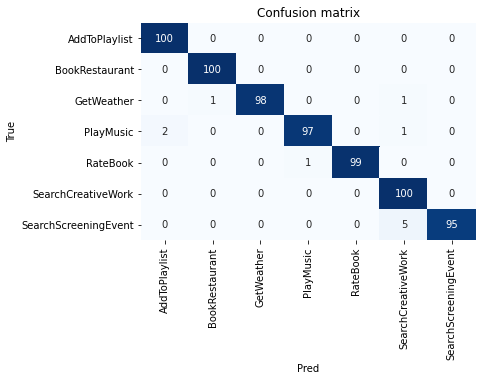

In [125]:
classes = np.unique(y_val)

print('Accuracy:', round(accuracy_score(y_val, y_pred),2))
print('F1_score:', round(f1_score(y_val, y_pred, average='weighted'),2))

print(classification_report(y_val, y_pred))
# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel='Pred', ylabel='True', xticklabels=classes, yticklabels=classes, title='Confusion matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### Zapoznanie się z błędnymi predykcjami 

In [126]:
# pobranie indexów błędnie przewidzianych etykiet 
indexes = []
for i, phrase in enumerate(y_pred):
  if phrase != y_val[i]:                                      #  Wszysktie błędne predykcje
    # if phrase == 'SearchCreativeWork':            #  konkretna klasa 1
    #   if y_val[i] == 'SearchScreeningEvent':      #  konkretna klasa 2
        indexes.append(i)
print(indexes)

[252, 367, 481, 499, 519, 557, 567, 583, 615, 648, 689]


In [127]:
# ustadaryzowanie obliczonego prawdopodobieństwa dla wystapienia danej etykiety 
import warnings
warnings.filterwarnings('ignore')

y_proba = [      [  round(j*100, 4) for j in i  ]       for i in model.predict_proba(X_validate)    ]
y_proba[:2]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0],
 [0.0119, 0.0182, 0.0011, 99.9565, 0.0044, 0.0074, 0.0005]]

In [128]:
for i in indexes:
  print(f"----------------------------\nTekst komendy id {i}:\n{data_set_valid['text'][i]}\n")
  print(f"Oczyszczona komenda i skrócona do wartości maxlen={maxlen}:\n{' '.join(data_set_valid['clean_text'][i].split()[:maxlen])}\n")
  print(f'True category: {y_val[i]} - probability - {y_proba[i][labelencoder.transform([y_val[i]])[0]]}%')
  print(f'Predicted category: {y_pred[i]} - probability - {y_proba[i][labelencoder.transform([y_pred[i]])[0]]}%')
  print("\n")

----------------------------
Tekst komendy id 252:
can you put on Like A Hurricane by Paul Landers

Oczyszczona komenda i skrócona do wartości maxlen=13:
can you put on like hurricane by paul landers

True category: PlayMusic - probability - 25.7653%
Predicted category: AddToPlaylist - probability - 73.1233%


----------------------------
Tekst komendy id 367:
overcast on State Holiday in Pawling Nature Reserve  and neighboring places

Oczyszczona komenda i skrócona do wartości maxlen=13:
overcast on state holiday in pawling nature reserve and neighboring places

True category: GetWeather - probability - 43.3957%
Predicted category: BookRestaurant - probability - 55.546%


----------------------------
Tekst komendy id 481:
Live In L.aJoseph Meyer please

Oczyszczona komenda i skrócona do wartości maxlen=13:
live in lajoseph meyer please

True category: PlayMusic - probability - 15.4059%
Predicted category: SearchCreativeWork - probability - 65.0812%


----------------------------
Tekst

Wnioski:
> 